# Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol.

Para isso, vamos seguir as etapas do processamento do Big Data

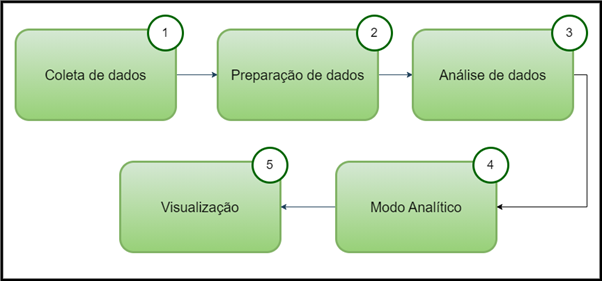


# Coleta dos dados 
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes. 

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv. 

# Coletando dados de estados brasileiros

In [ ]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo 
PATH = r'C:\Users\leandro.figueira\Google Drive\IGTI\MATERIAIS ALUNOS\FDA-material-video-aulas\datasets'
estados = pd.read_csv(PATH + '\estados_brasileiros.csv', sep = ';', encoding='latin-1')


In [ ]:
estados.head()

# Coletando dados de clientes

In [ ]:
clientes = pd.read_excel(PATH + '\\amostra_dados_clientes.xlsx')
clientes.head()

# Coletando dados das idades dos clientes

In [ ]:
idade = pd.read_csv(PATH + '\idade_clientes.csv', sep = ';', encoding='latin-1')
idade.head()

#Preparação dos dados 
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

# Analisando as variáveis da base de dados

In [ ]:
clientes.info()

In [ ]:
clientes.describe()

In [ ]:
estados.info()

In [ ]:
idade.info()

In [ ]:
idade.describe()

#Analisando dados ausentes

In [ ]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

In [ ]:
clientes.isna().sum()

In [ ]:
idade.isna().sum()

In [ ]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

Identicamos 3 valores ausentes na base de dados de clientes.
Para esse caso, temos 3 opções para tratamento de dados númericos. 

1. Eliminação dos registros
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor cetral dos dados) 


Por exemplo:

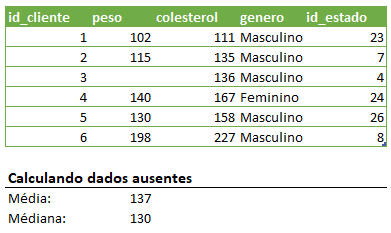

# Eliminando dados ausentes

In [ ]:
#Dados Ausentes
clientes.dropna(subset=['peso'], inplace=False) # para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [ ]:
clientes.isna().sum()

In [ ]:
clientes.count()

Alterando os dados por outras medidas


In [ ]:
clientes.describe()

In [ ]:
# Realizando a média e mediana da variável peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [ ]:
# verificando valores
print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


In [ ]:
# Fazendo arrendondamento da variável média
round(media,2)

In [ ]:
# preencher valores ausentes pela média
clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

In [ ]:
clientes.count()

# Substituindo variável categórica

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [ ]:
print(estados.pais.value_counts())

In [ ]:
estados.pais.fillna('Brasil', inplace=True)

In [ ]:
estados.isna().sum()

# Analisando distribuição dos dados


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

In [ ]:
#Criando um Identificador para a variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3 )

# Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta



In [ ]:
estados[:7]

In [ ]:
clientes[:5]

In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

In [ ]:
#realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

In [ ]:
base_completa.reset_index(drop=True)

# Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [ ]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

In [ ]:
# Alterando as linhas da variável sigla_estado 
base_completa.sigla_estado.str.upper()

In [ ]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [ ]:
base_completa

# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.

In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]]

In [ ]:
base_completa = base_completa[['cod_cliente','genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

In [ ]:
base_completa

# Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

#Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_cliente = base_completa[['peso', 'colesterol','idade']]
dados_cliente.head()

In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)

In [ ]:
type(wcss_clientes)

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

# Visualizando o gráfico do cotovelo

In [ ]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()



In [ ]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

# Calcula os centroides de cada cluster

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

In [ ]:
dados_cliente

Aqui temos os centroides dos 3 cluster de acordo com os atributos. 
Nesse exemplo vemos os centroides de 'peso', 'colesterol','idade' respectivamente.

In [ ]:
grafico = px.scatter(x = base_completa['peso'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# Visualizando e alterando layout do gráfico

In [ ]:
grafico = px.scatter(x = base_completa['colesterol'], 
                     y = base_completa['peso'], 
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',                  
                  ) 


fig.show()

# Criando Função para Gerar gráficos

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [ ]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos




In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)


In [ ]:
cluster_clientes = base_completa

In [ ]:
# Seguimentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Risco Moderado'

In [ ]:
cluster_clientes

# Análises dos clusters criados

In [ ]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

In [ ]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

In [ ]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

# Exportando dados 

In [ ]:
# cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1') 